In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pyrfr.regression as rfreg

In [5]:
# Sets plot styles
sns.set_style('darkgrid')
sns.set_color_codes()
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [6]:
# Location of fitted forests
fitted_forest_file = b'fitted_forests/parameter_fitting_run.bin'

In [7]:
# Create forest
reg_forest = rfreg.binary_rss()

In [8]:
# Load forest
reg_forest.load_from_binary_file(fitted_forest_file)

In [9]:
# Load Data
feats = np.load('full_runs_data.npy')
response = np.load('full_response.npy')

In [10]:
feats_df = pd.DataFrame(feats)
error_df = pd.DataFrame(response)

In [11]:
total_df = pd.concat([error_df,feats_df], axis=1)
total_df.columns =['error'] +['param_'+str(i) for i in range(28)]

In [12]:
best_df = total_df[total_df['error'] == total_df.error.min()].sample(n=10, replace=True)

In [13]:
best_df

,error,param_0,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,...,param_18,param_19,param_20,param_21,param_22,param_23,param_24,param_25,param_26,param_27
659,0.012346,171,0.152366,0.650134,0.808500,0.881198,0.285800,0.593314,0.074184,0.274967,...,3390,18,0.464284,4,0.030270,0.091690,0.025418,0.070358,0.037071,0.007976
600,0.012346,275,0.676804,0.574869,0.577597,0.589949,0.888228,0.712073,0.262108,0.909249,...,2056,10,0.413255,3,0.058553,0.040004,0.053026,0.053220,0.088900,0.006481
224,0.012346,166,0.694455,0.861946,0.194625,0.338222,0.025693,0.486993,0.539208,0.983808,...,5194,6,0.909836,5,0.021945,0.003534,0.068123,0.025992,0.089671,0.061965
387,0.012346,854,0.196384,0.913762,0.084144,0.861973,0.171859,0.904045,0.019498,0.921645,...,725,10,0.017938,2,0.032325,0.021721,0.067461,0.086482,0.087822,0.071028
148,0.012346,858,0.293226,0.245561,0.030083,0.220053,0.949264,0.119277,0.845376,0.958895,...,4806,20,0.456756,5,0.092327,0.075637,0.079724,0.011222,0.042025,0.021689
224,0.012346,166,0.694455,0.861946,0.194625,0.338222,0.025693,0.486993,0.539208,0.983808,...,5194,6,0.909836,5,0.021945,0.003534,0.068123,0.025992,0.089671,0.061965
539,0.012346,311,0.803819,0.685392,0.184439,0.793024,0.439552,0.704647,0.347393,0.639331,...,288,18,0.053038,1,0.052216,0.049061,0.072336,0.000672,0.036038,0.047631
221,0.012346,911,0.530324,0.183405,0.901414,0.600503,0.487614,0.431613,0.438590,0.544210,...,1050,15,0.610072,2,0.083734,0.072827,0.055774,0.064888,0.027074,0.032508
734,0.012346,797,0.152096,0.024367,0.005173,0.690624,0.660479,0.484995,0.566766,0.688940,...,1726,11,0.535338,2,0.071988,0.002770,0.014745,0.006032,0.091400,0.027826
659,0.012346,171,0.152366,0.650134,0.808500,0.881198,0.285800,0.593314,0.074184,0.274967,...,3390,18,0.464284,4,0.030270,0.091690,0.025418,0.070358,0.037071,0.007976


In [20]:
best_df.ix[148]

error          0.012346
param_0      858.000000
param_1        0.293226
param_2        0.245561
param_3        0.030083
param_4        0.220053
param_5        0.949264
param_6        0.119277
param_7        0.845376
param_8        0.958895
param_9        0.565386
param_10       0.208788
param_11       0.516191
param_12       2.000000
param_13    1252.000000
param_14     606.000000
param_15    3189.000000
param_16    4819.000000
param_17    2582.000000
param_18    4806.000000
param_19      20.000000
param_20       0.456756
param_21       5.000000
param_22       0.092327
param_23       0.075637
param_24       0.079724
param_25       0.011222
param_26       0.042025
param_27       0.021689
Name: 148, dtype: float64

In [14]:
# Number of samples to extrapolate
nsamples = 500

prediction_window = np.linspace(1e-3, 0.4, num=nsamples)

Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.06275337792968752, 0.17283814303886486)
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.08824747200520834, 0.18076935987979903)
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.20722353024088547, 0.3228019959017734)
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.17985286061197908, 0.2964714077679118)
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.08010940635230655, 0.1711791788214553)
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.20722353024088547, 0.3228019959017734)
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.11501046087239587, 0.22914683534099597)
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.04157201198593078, 0.11011106257679483)
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.

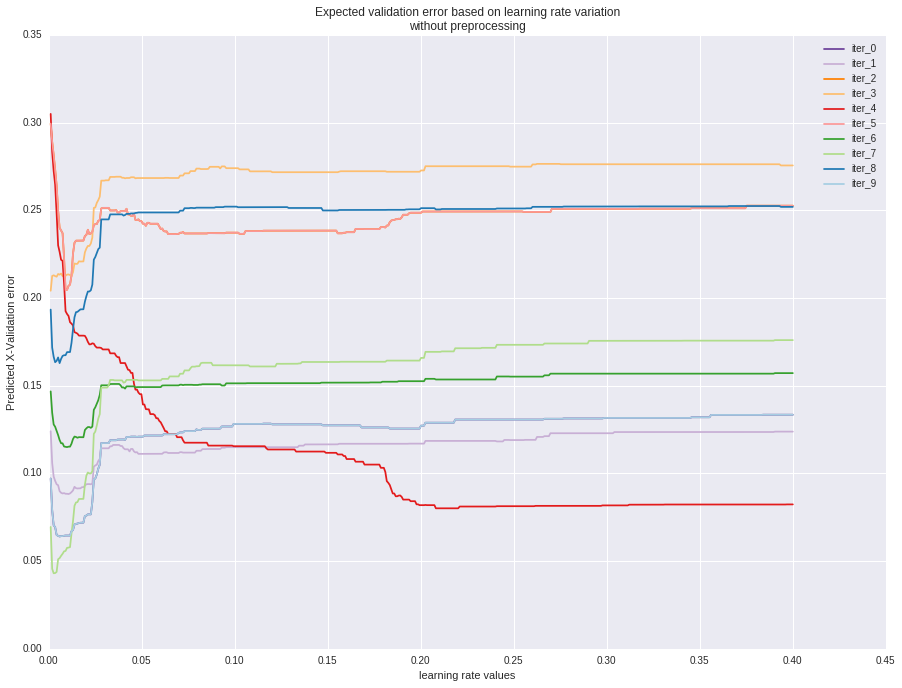

In [17]:
# Create canvas
fig1 = plt.figure(1, figsize=(15.,11.))
ax1 = plt.subplot(111)
color_stack = sns.color_palette('Paired',10)

for i in range(best_df.shape[0]):
    best_array = np.array(best_df.iloc[i, 1:].values, order='C')
    response_value = np.array(best_df.iloc[i,0], order='C')
    best_config = np.tile(best_array, (nsamples, 1))
    best_config[:, 10] = prediction_window

    print("Best X-Validation error is {}".format(response_value))
    print("Best predicted X-Validation error is {}".format(reg_forest.predict(best_array)))

    pred_performance = np.zeros((nsamples, 2))

    for j in range(nsamples):
        pred_performance[j] = reg_forest.predict(best_config[j])

    mean_pred_performance = pred_performance[:, 0]
    std_pred_performance = pred_performance[:, 1]

    #plt.fill_between(prediction_window, mean_pred_performance+std_pred_performance,
    #                 mean_pred_performance-std_pred_performance,  alpha=0.4)
    ax1.plot(prediction_window, mean_pred_performance, color=color_stack.pop(), label='config_'+str(i))
    #plt.scatter(feats[217, 10], response[217])
    ax1.set_xlabel('learning rate values')
    ax1.set_ylabel('Predicted X-Validation error')
    plt.title(u'Expected validation error based on learning '
              u'rate variation\nwithout preprocessing')
    plt.legend()

35